![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [58]:
# Import necessary packages
import pandas as pd
import numpy as np

## Dates of Reviews

In [59]:
# Load the TSV file containing review dates
df_reviews = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')

# Convert the 'last_review' column to datetime format
df_reviews['last_review'] = pd.to_datetime(df_reviews['last_review'])

# Find the earliest and most recent review dates
earliest_review = df_reviews['last_review'].min()
most_recent_review = df_reviews['last_review'].max()

print(f"Earliest Review: {earliest_review}")
print(f"Most Recent Review: {most_recent_review}")

Earliest Review: 2019-01-01 00:00:00
Most Recent Review: 2019-07-09 00:00:00


## Private Room Listings

In [60]:
# Load the Excel file containing room types
df_rooms = pd.read_excel('data/airbnb_room_type.xlsx')

# Count the number of private room listings
nb_private_rooms = (df_rooms['room_type'] == 'Private room').sum()

print(f"Number of Private Room Listings: {nb_private_rooms}")

Number of Private Room Listings: 7241


## Average Price Calculation

In [61]:
# Load the CSV file containing price data
df_prices = pd.read_csv('data/airbnb_price.csv')

# Remove non-numeric characters (like 'dollars') using regex and convert to numeric
df_prices['price'] = df_prices['price'].replace(r'[^\d.]', '', regex=True).astype(float)

# Now calculate the average price
avg_price = df_prices['price'].mean()

# Round to the nearest two decimal places
avg_price = round(avg_price, 2)

print(f"Average Listing Price: ${avg_price}")

Average Listing Price: $141.78


## Summary Table

In [62]:
# Combine the calculated values into a DataFrame
review_dates = pd.DataFrame({
    'first_reviewed': [earliest_review],
    'last_reviewed': [most_recent_review],
    'nb_private_rooms': [nb_private_rooms],
    'avg_price': [avg_price]
})

print(review_dates)

  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2019-01-01    2019-07-09              7241     141.78


## Neighborhood Trends

In [63]:
import pandas as pd

# Load the CSV file containing price data
df_prices = pd.read_csv('data/airbnb_price.csv')

# Remove non-numeric characters (like 'dollars') using regex and convert to numeric
df_prices['price'] = df_prices['price'].replace(r'[^\d.]', '', regex=True)

# Convert the 'price' column to numeric, forcing errors to NaN
df_prices['price'] = pd.to_numeric(df_prices['price'], errors='coerce')

# Drop rows with NaN prices (optional, depending on how you want to handle them)
df_prices = df_prices.dropna(subset=['price'])

# Now calculate the average price
avg_price = df_prices['price'].mean()

# Round to the nearest two decimal places
avg_price = round(avg_price, 2)

print(f"Average Listing Price: ${avg_price}")

# If performing a group-by operation (e.g., neighborhood trends)
df_neighborhoods = pd.read_csv('data/airbnb_price.csv')

# Ensure 'price' column is numeric and handle NaNs
df_neighborhoods['price'] = pd.to_numeric(df_neighborhoods['price'], errors='coerce')

# Drop rows with NaN prices (optional)
df_neighborhoods = df_neighborhoods.dropna(subset=['price'])

# Group by neighborhood and calculate average price and number of listings
neighborhood_trends = df_neighborhoods.groupby('nbhood_full').agg(
    average_price=('price', 'mean'),
    number_of_listings=('listing_id', 'count')
).reset_index()

# Sort by average price in descending order and take top 5
neighborhood_trends = neighborhood_trends.sort_values(by='average_price', ascending=False).head(5)

print(neighborhood_trends)

Average Listing Price: $141.78
Empty DataFrame
Columns: [nbhood_full, average_price, number_of_listings]
Index: []


Word Analysis in Descriptions

In [64]:
import pandas as pd
import re
from collections import Counter

# Load the room type data to access descriptions
df_descriptions = pd.read_excel('data/airbnb_room_type.xlsx')

# Convert all descriptions to strings (and handle NaN values)
df_descriptions['description'] = df_descriptions['description'].astype(str)

# Combine all descriptions into a single text
all_descriptions = ' '.join(df_descriptions['description'].dropna())

# Tokenize the descriptions and clean up the text
words = re.findall(r'\b\w+\b', all_descriptions.lower())

# Define stopwords (you can use more sophisticated stopwords lists if needed)
stopwords = set(['the', 'and', 'a', 'of', 'to', 'in', 'on', 'at', 'for', 'with', 'this', 'that', 'is', 'was', 'are', 'be', 'by', 'from', 'as'])

# Filter out stopwords
filtered_words = [word for word in words if word not in stopwords]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

print(top_10_words)

[('room', 5282), ('private', 4243), ('bedroom', 3972), ('apartment', 3325), ('cozy', 2802), ('apt', 2305), ('brooklyn', 2236), ('2', 2174), ('manhattan', 2132), ('studio', 2032)]


In [65]:
import pandas as pd

# Load the data from the CSV, Excel, and TSV files
price_df = pd.read_csv('data/airbnb_price.csv')  # replace with actual path
room_type_df = pd.read_excel('data/airbnb_room_type.xlsx')  # replace with actual path
last_review_df = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')  # replace with actual path

# Merging the data on 'listing_id' to get a unified DataFrame
merged_df = pd.merge(price_df, room_type_df, on='listing_id', how='inner')
merged_df = pd.merge(merged_df, last_review_df, on='listing_id', how='inner')

# Convert the 'price' column to string type before applying .str accessor
merged_df['price'] = merged_df['price'].astype(str)

# Now apply the cleaning operation to remove non-numeric characters
merged_df['price'] = merged_df['price'].str.replace(r'[^0-9]', '', regex=True).astype(float)

# Check the cleaned DataFrame
print(merged_df)

       listing_id  price                 nbhood_full  \
0            2595  225.0          Manhattan, Midtown   
1            3831   89.0      Brooklyn, Clinton Hill   
2            5099  200.0      Manhattan, Murray Hill   
3            5178   79.0   Manhattan, Hell's Kitchen   
4            5238  150.0        Manhattan, Chinatown   
...           ...    ...                         ...   
25204    36425863  129.0  Manhattan, Upper East Side   
25205    36427429   45.0            Queens, Flushing   
25206    36438336  235.0  Staten Island, Great Kills   
25207    36442252  100.0           Bronx, Mott Haven   
25208    36455809   30.0          Brooklyn, Bushwick   

                                      description        room_type  \
0                           Skylit Midtown Castle  Entire home/apt   
1                 Cozy Entire Floor of Brownstone  Entire home/apt   
2       Large Cozy 1 BR Apartment In Midtown East  Entire home/apt   
3                 Large Furnished Room Near B'w

In [66]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


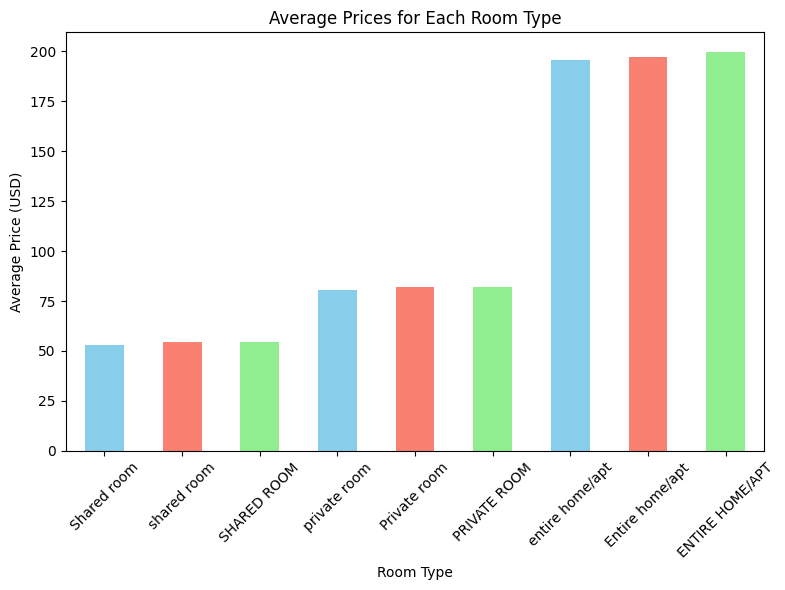

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df = merged_df[merged_df['price'] > 0]

# Grouping by 'room_type' and calculating the average price for each
average_price_by_room_type = merged_df.groupby('room_type')['price'].mean().sort_values()

# Drop rows with missing 'room_type' or 'price'
merged_df = merged_df.dropna(subset=['room_type', 'price'])

# Calculate the average price by room type
average_price_by_room_type = merged_df.groupby('room_type')['price'].mean().sort_values()

# If the result is valid, plot the bar chart
if not average_price_by_room_type.empty:
    plt.figure(figsize=(8, 6))
    average_price_by_room_type.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
    plt.title('Average Prices for Each Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Average Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No valid data available to plot.")

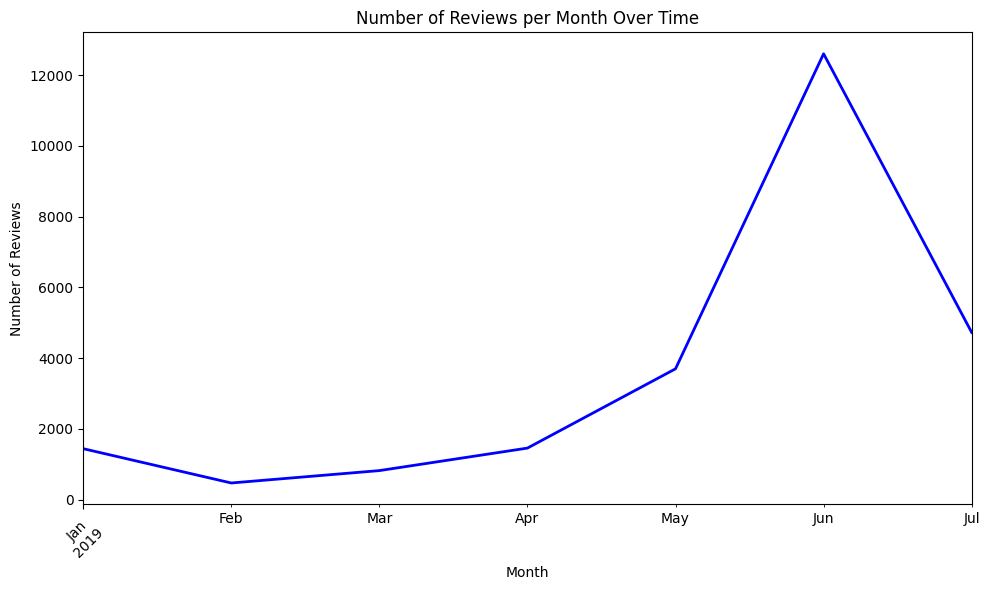

In [68]:
# Load the data
df_reviews = pd.read_csv('data/airbnb_last_review.tsv', delimiter='\t')

# Convert the 'last_review' column to datetime
df_reviews['last_review'] = pd.to_datetime(df_reviews['last_review'])

# Group by month and year to get the number of reviews per month
df_reviews['year_month'] = df_reviews['last_review'].dt.to_period('M')
reviews_per_month = df_reviews.groupby('year_month').size()

# Plotting the trend of reviews per month
plt.figure(figsize=(10, 6))
reviews_per_month.plot(kind='line', color='blue', linewidth=2)
plt.title('Number of Reviews per Month Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [69]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


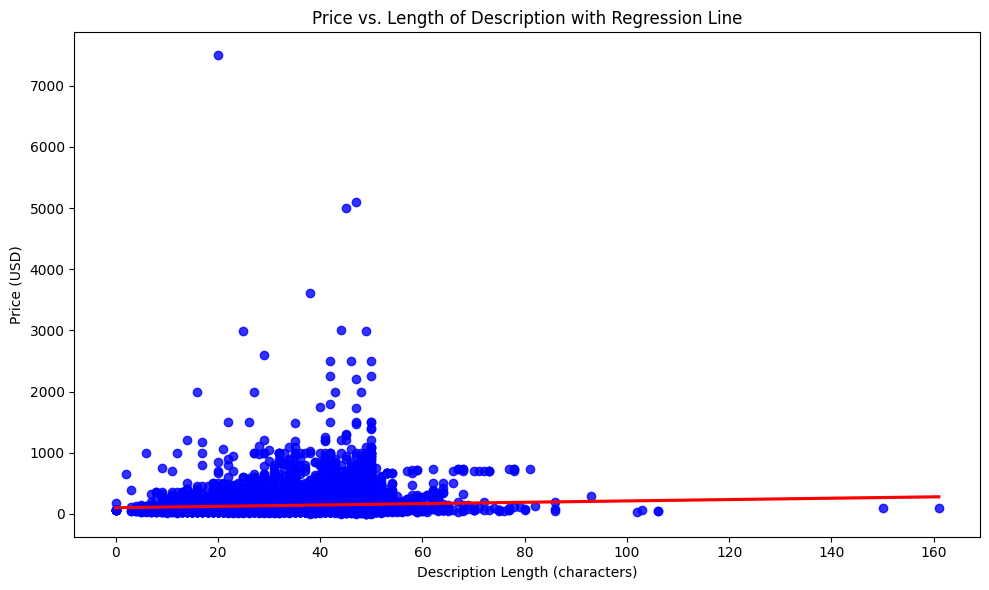

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV, Excel, and TSV files
price_df = pd.read_csv('data/airbnb_price.csv')  # replace with actual path
room_type_df = pd.read_excel('data/airbnb_room_type.xlsx')  # replace with actual path
last_review_df = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')  # replace with actual path

# Merging the data on 'listing_id' to get a unified DataFrame
merged_df = pd.merge(price_df, room_type_df, on='listing_id', how='inner')
merged_df = pd.merge(merged_df, last_review_df, on='listing_id', how='inner')

# Convert the 'price' column to string type before applying .str accessor
merged_df['price'] = merged_df['price'].astype(str)

# Now apply the cleaning operation to remove non-numeric characters
merged_df['price'] = merged_df['price'].str.replace(r'[^0-9]', '', regex=True).astype(float)

# Ensure descriptions are strings and handle NaN values by replacing them with an empty string
merged_df['description'] = merged_df['description'].fillna('')

# Convert any non-string descriptions to strings
merged_df['description'] = merged_df['description'].astype(str)

# Calculate the length of each description
merged_df['description_length'] = merged_df['description'].apply(len)


# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='description_length', y='price', data=merged_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Annotating outliers
outliers = merged_df[merged_df['description_length'] > 500]  # Example condition for outliers
for _, row in outliers.iterrows():
    plt.annotate(f'Outlier: {row["listing_id"]}', (row['description_length'], row['price']),
                 textcoords="offset points", xytext=(0, 10), ha='center', color='green')

plt.title('Price vs. Length of Description with Regression Line')
plt.xlabel('Description Length (characters)')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()


C:\Users\Aftab\AppData\Local\Temp\ipykernel_4348\3562617946.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


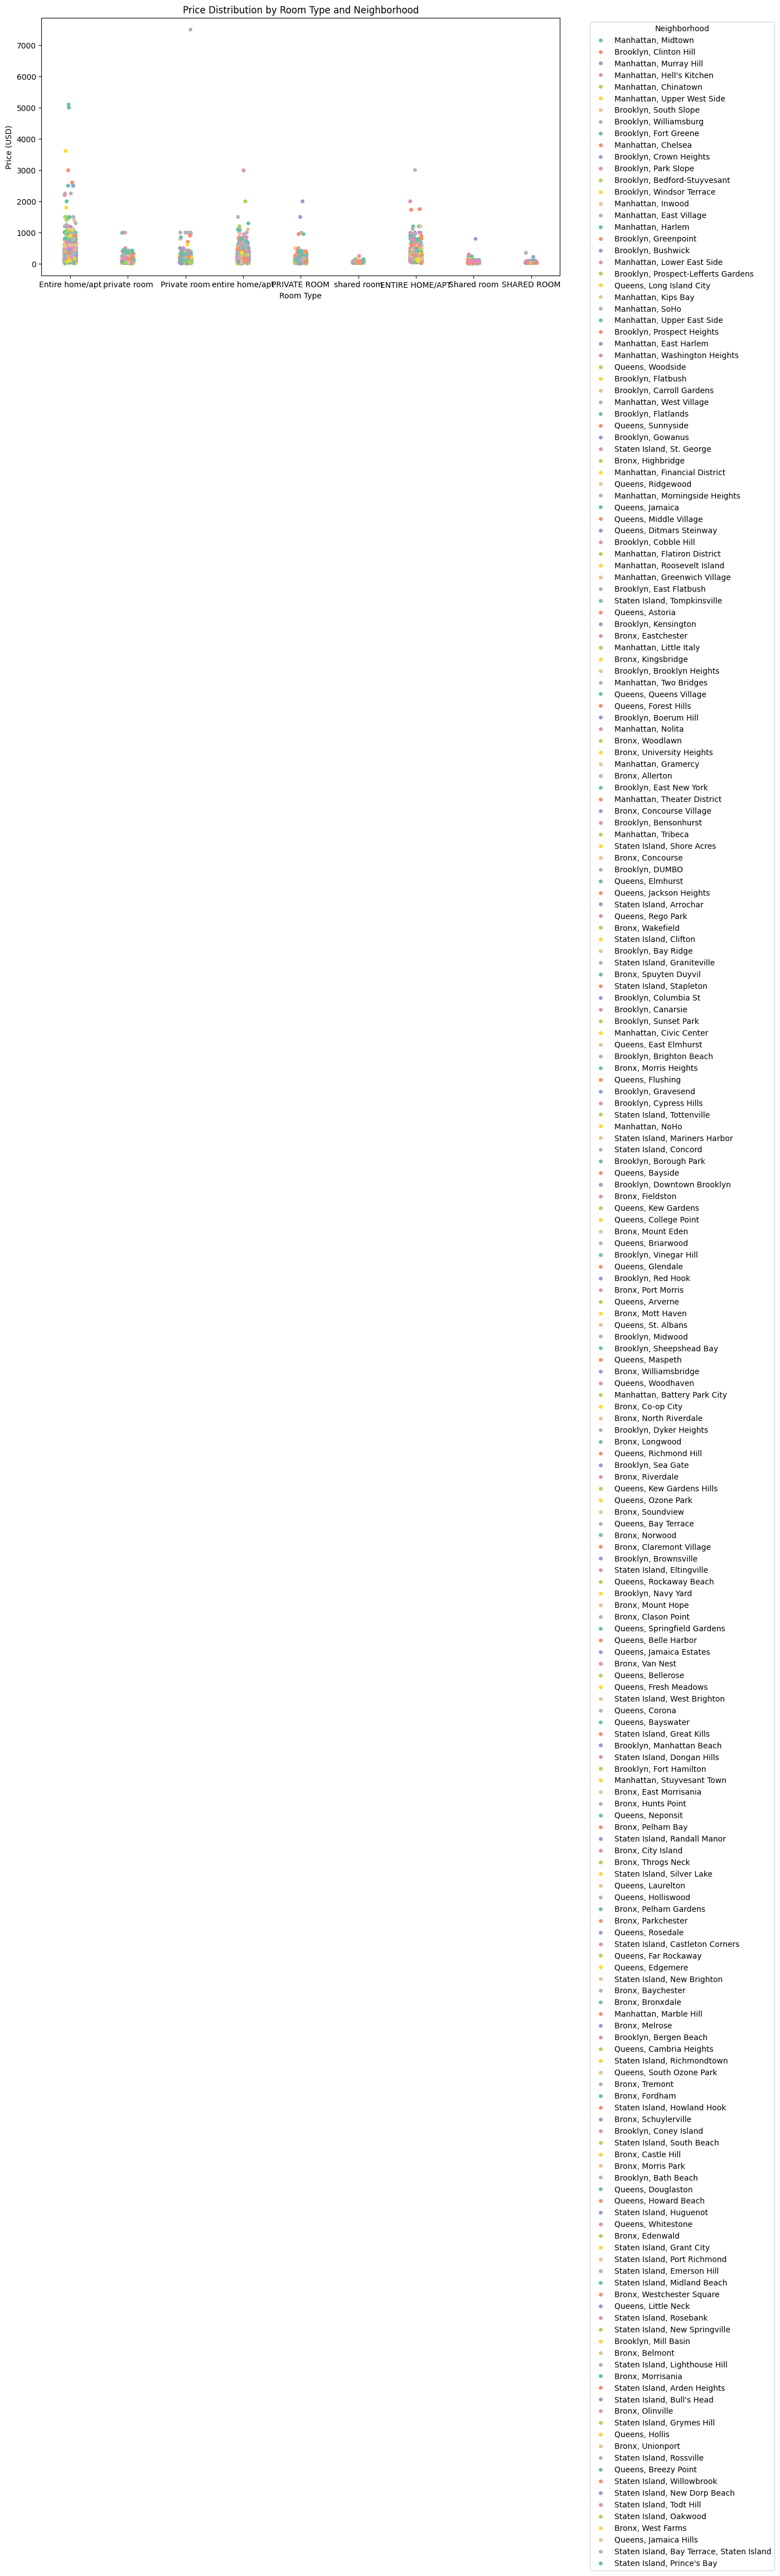

In [71]:
# Create a strip plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='room_type', y='price', data=merged_df, hue='nbhood_full', jitter=True, palette='Set2')

# Customize the plot
plt.title('Price Distribution by Room Type and Neighborhood')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\Aftab\AppData\Local\Temp\ipykernel_4348\3696460029.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=merged_df, palette='Set2')


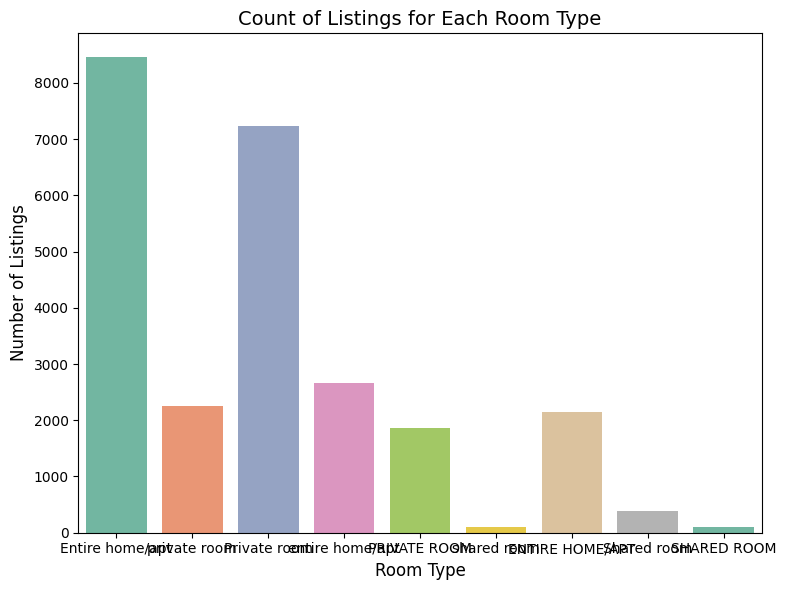

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming merged_df is already prepared from your data
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=merged_df, palette='Set2')

# Adding labels and title
plt.title('Count of Listings for Each Room Type', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


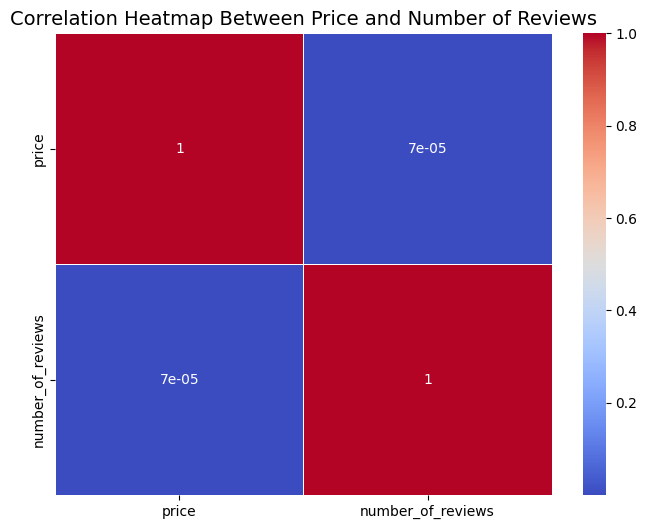

In [73]:
# Assuming merged_df has the necessary columns 'price' and 'number_of_reviews' 
# (you may need to calculate 'number_of_reviews' from the 'last_review' column, depending on the dataset)

# Create a correlation matrix
correlation = merged_df[['price', 'last_review']].copy()

# Convert 'last_review' column to datetime
merged_df['last_review'] = pd.to_datetime(merged_df['last_review'], errors='coerce')

# Calculate number of reviews (per month, for example)
merged_df['review_month'] = merged_df['last_review'].dt.to_period('M')
review_counts = merged_df.groupby('review_month')['listing_id'].count().reset_index()
review_counts = review_counts.rename(columns={'listing_id': 'number_of_reviews'})

# Merge the dataframes for correlation
merged_df_corr = pd.merge(merged_df, review_counts, left_on='review_month', right_on='review_month', how='inner')

# Create the correlation matrix
corr_matrix = merged_df_corr[['price', 'number_of_reviews']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)

# Adding title
plt.title('Correlation Heatmap Between Price and Number of Reviews', fontsize=14)
plt.show()


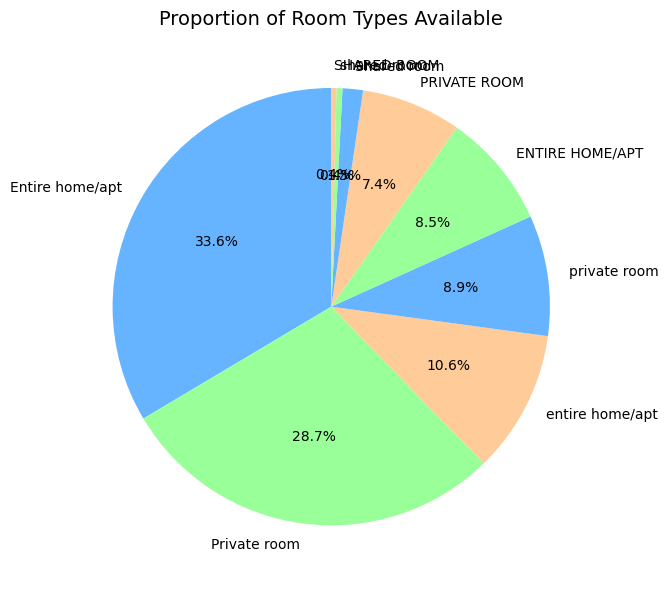

In [74]:
# Calculate the proportions of room types
room_type_counts = merged_df['room_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'], startangle=90)

# Adding title and labels
plt.title('Proportion of Room Types Available', fontsize=14)
plt.ylabel('')  # Hide the y-label for aesthetics
plt.tight_layout()

# Show the plot
plt.show()


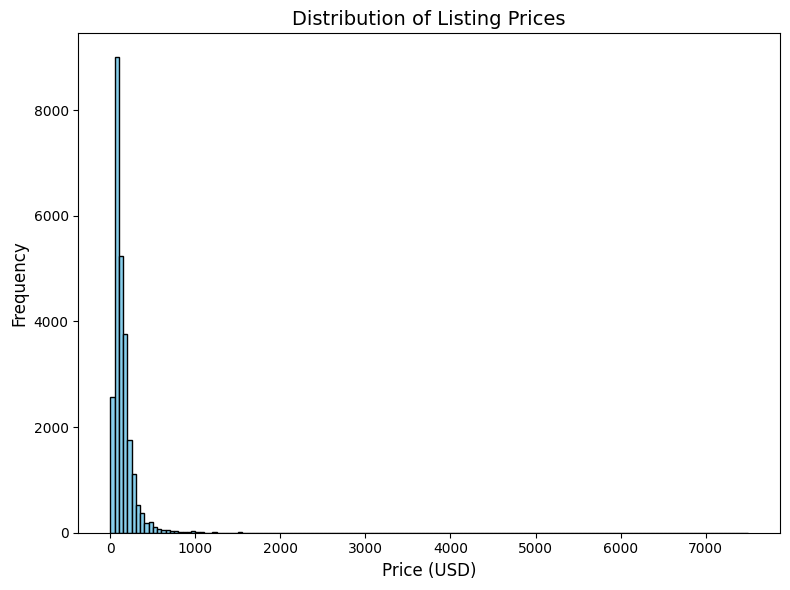

In [75]:
# Plotting the histogram of listing prices
plt.figure(figsize=(8, 6))

# Plot histogram with bins of size 50
plt.hist(merged_df['price'], bins=range(0, int(merged_df['price'].max()) + 50, 50), color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Listing Prices', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Aftab\AppData\Local\Temp\ipykernel_4348\147654191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='nbhood_full', y='price', data=merged_df, palette='Set2')


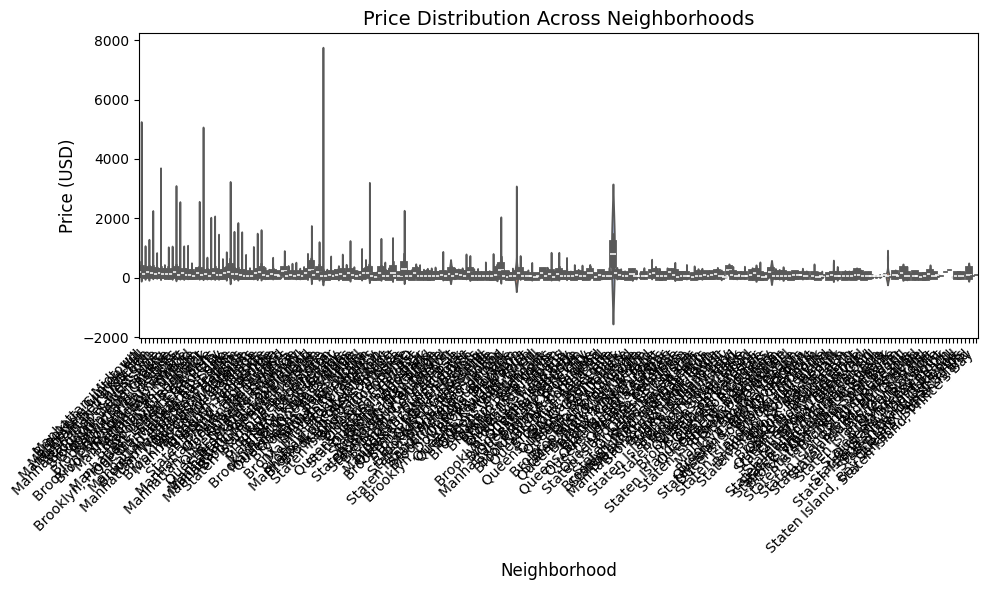

In [76]:
# Violin plot comparing price distributions across neighborhoods
plt.figure(figsize=(10, 6))

# Create the violin plot
sns.violinplot(x='nbhood_full', y='price', data=merged_df, palette='Set2')

# Adding title and labels
plt.title('Price Distribution Across Neighborhoods', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
